In [28]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import datetime as dt

In [151]:
f = open('data.json')
data = json.load(f) 

df = pd.json_normalize(data)

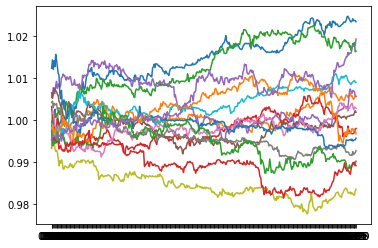

In [152]:
df['date'] = df['datetime'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S%z").strftime("%Y-%m-%d"))
df['time'] = df['datetime'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S%z").strftime("%H:%M"))
ans = [y for x, y in df.groupby('date', as_index=False)]


grouped = df.groupby(df.date)

for group_name, df_group in grouped:
    start = df_group["time"].min()
    openvalue =  df_group[(df_group['time'] == start)]
    df_group['day_open'] = openvalue['open'].values[0]
    df_group['norm_close'] = df_group['close'] / df_group['day_open']#row.close / row.day_open
#     print(group_name,openvalue.open)
    y = df_group['norm_close'] 
    x = df_group['time']
    plt.plot(x, y)
#     print(df_group)    
